<h1><font color=blue>Portfolio Assessment</font></h1>

<h2><font color=blue>Artificial Intelligence (AI)</font></h2>

<h1><center><font color=purple>Classification of Foetal Health using Machine Learning and Deep Learning Techniques </font></center></h1>

<h3><font color=BLACK>Importing the Libraries</font></h3>

In [141]:
# Importing Essential Libraries for visualisations

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
color=["blue","purple","teal"]
plt.style.use('seaborn-whitegrid')

In [142]:
# Libraries for Data Pre-processing and Evaluation

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.utils import resample
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, learning_curve, cross_validate, train_test_split, KFold

In [143]:
# Importing Classification Models 

from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

In [144]:
import warnings
warnings.simplefilter(action ="ignore")

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

<h3><font color=BLACK>Reading the Data</font></h3>

In [145]:
import pandas as pd
fetal=pd.read_csv('fetal_health.csv')
fetal.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


<h3><font color=BLACK>Exploratory Data Analysis (EDA)</font></h3>

In [146]:
cols = fetal.columns
cols

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

<h3><font color=BLACK>Features</font></h3>

'baseline value': FHR baseline (beats per minute)

'accelerations': Number of accelerations per second

'fetal_movement': Number of fetal movements per second

'uterine_contractions': Number of uterine contractions per second

'light_decelerations': Number of light decelerations per second

'severe_decelerations': Number of severe decelerations per second

'prolongued_decelerations': Number of prolonged decelerations per second

'abnormal_short_term_variability': Percentage of time with abnormal short term variability

'mean_value_of_short_term_variability': Mean value of short term variability

'percentage_of_time_with_abnormal_long_term_variability': Percentage of time with abnormal long term variability

'mean_value_of_long_term_variability': Mean value of long term variability

'histogram_width': Width of FHR histogram

'histogram_min': Minimum (low frequency) of FHR histogram 

'histogram_max': Maximum (high frequency) of FHR histogram

'histogram_number_of_peaks': Number of histogram peaks

'histogram_number_of_zeroes': Number of histogram zeros

'histogram_mode': Histogram mode

'histogram_mean': Histogram mean

'histogram_median': Histogram median

'histogram_variance': Histogram variance

'histogram_tendency': Histogram tendency

<h3><font color=BLACK>Target</font></h3>

'fetal_health': 1 = Normal, 2 = Suspect, 3 = Pathological

<h3><font color=BLACK>Meaning of the Target Variables:</font></h3>

1 - Normal

2 - Suspected

3 - Pathological

In [147]:
fetal.info

<bound method DataFrame.info of       baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
5              134.0          0.001           0.000                 0.010   
6              134.0          0.001           0.000                 0.013   
7              122.0          0.000           0.000                 0.000   
8              122.0          0.000           0.000                 0.002   
9              122.0          0.000           0.000                 0.003   
10             151.0          0.000           0.000                 0.001   
11             150.0          0.000         

In [148]:
fetal.describe().round(2)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.00,2126.00,2126.00,2126.00,2126.00,2126.0,2126.0,2126.00,2126.00,2126.00,...,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00
mean,133.30,0.00,0.01,0.00,0.00,0.0,0.0,46.99,1.33,9.85,...,93.58,164.03,4.07,0.32,137.45,134.61,138.09,18.81,0.32,1.30
std,9.84,0.00,0.05,0.00,0.00,0.0,0.0,17.19,0.88,18.40,...,29.56,17.94,2.95,0.71,16.38,15.59,14.47,28.98,0.61,0.61
min,106.00,0.00,0.00,0.00,0.00,0.0,0.0,12.00,0.20,0.00,...,50.00,122.00,0.00,0.00,60.00,73.00,77.00,0.00,-1.00,1.00
25%,126.00,0.00,0.00,0.00,0.00,0.0,0.0,32.00,0.70,0.00,...,67.00,152.00,2.00,0.00,129.00,125.00,129.00,2.00,0.00,1.00
50%,133.00,0.00,0.00,0.00,0.00,0.0,0.0,49.00,1.20,0.00,...,93.00,162.00,3.00,0.00,139.00,136.00,139.00,7.00,0.00,1.00
75%,140.00,0.01,0.00,0.01,0.00,0.0,0.0,61.00,1.70,11.00,...,120.00,174.00,6.00,0.00,148.00,145.00,148.00,24.00,1.00,1.00
max,160.00,0.02,0.48,0.02,0.02,0.0,0.0,87.00,7.00,91.00,...,159.00,238.00,18.00,10.00,187.00,182.00,186.00,269.00,1.00,3.00


In [149]:
print(f"The dataset size: {fetal.shape}")

The dataset size: (2126, 22)


In [150]:
count = fetal.fetal_health.value_counts()
count

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [151]:
# Changing the data type of the target variable column to float
fetal.fetal_health = fetal.fetal_health.astype(int)
fetal.fetal_health.dtype

dtype('int32')

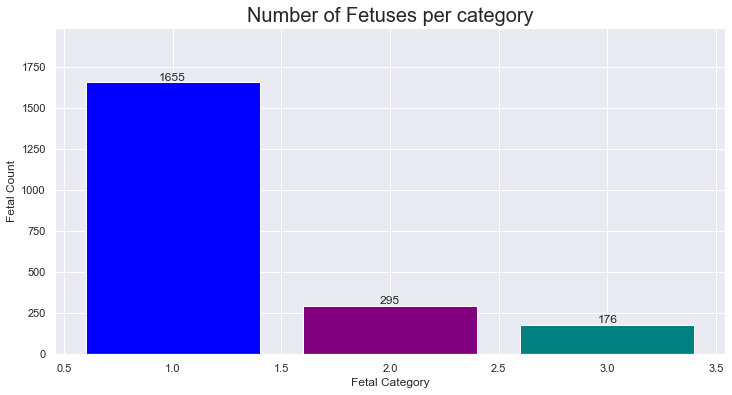

In [152]:
x = count.index
y = count.values
sns.set(font_scale=1)
plt.figure(figsize=(12,6))
plt.bar(x=x, height=y, color=color)
plt.title("Number of Fetuses per category", fontsize=20)
plt.xlabel("Fetal Category", fontsize=12)
plt.ylabel("Fetal Count", fontsize=12)

for i in range(len(y)):
    plt.annotate(str(y[i]), xy=(x[i],y[i]), ha='center', va='bottom')
    
plt.margins(y=0.2)

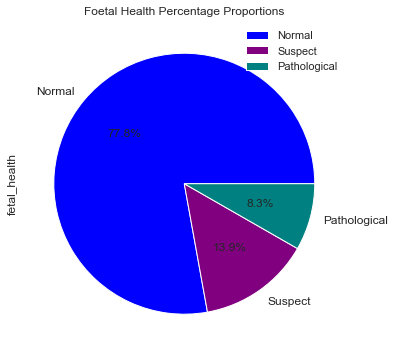

In [153]:
piechart  =pd.DataFrame(fetal['fetal_health'].replace(1.0,'Normal').replace(2.0,'Suspect').replace(3.0,'Pathological').value_counts())
piechart.plot(kind='pie', title='Foetal Health Percentage Proportions',y = 'fetal_health', 
autopct='%1.1f%%', shadow=False, colors=color,  legend = True, fontsize=12, figsize=(6,6))

From the charts above we can see the data distrubution of the Target Class (fetal_health) is highly imbalanced.

<h3><font color=BLACK>Skewness and Data Distribution</font></h3>

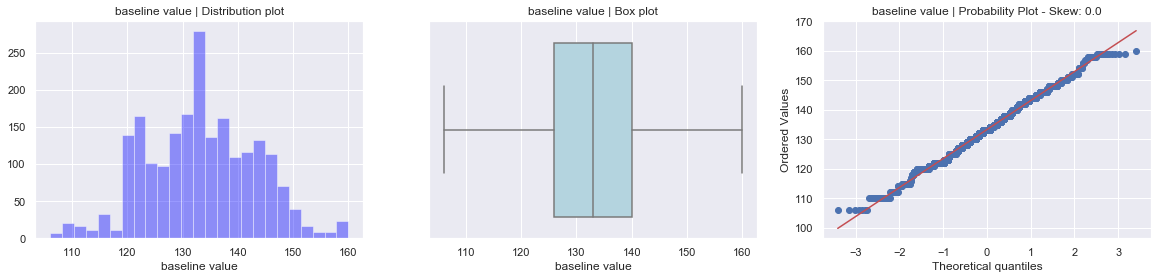

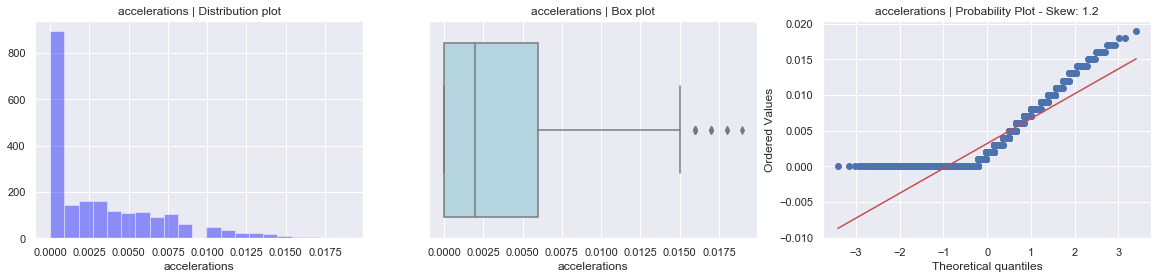

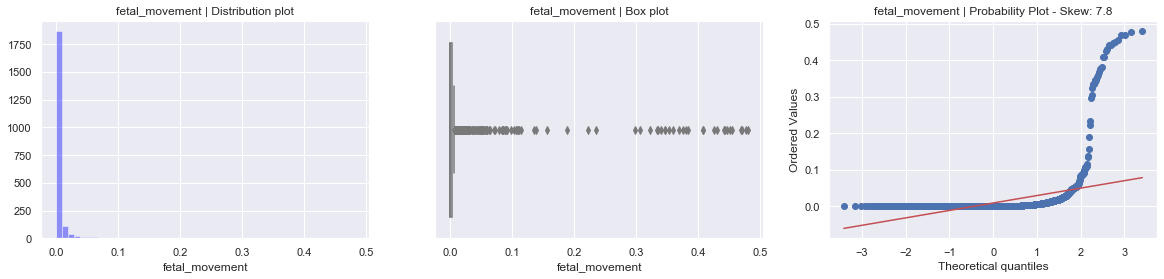

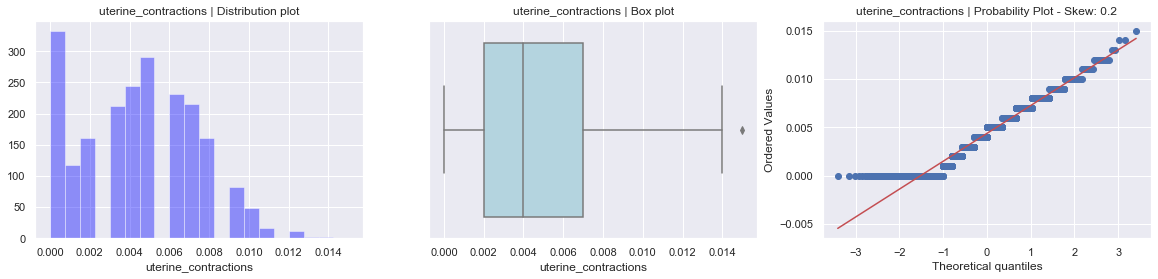

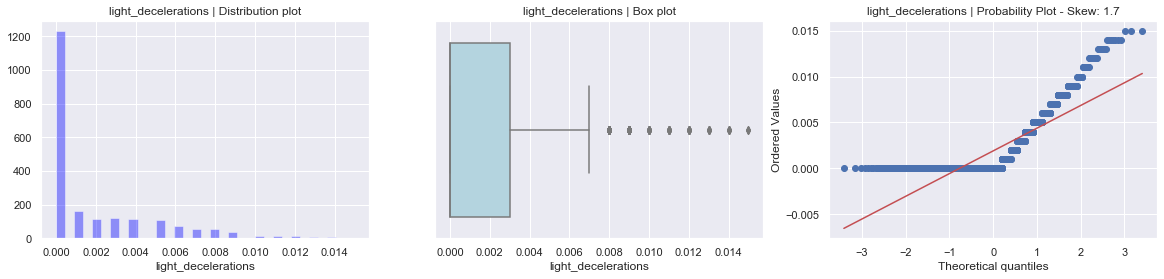

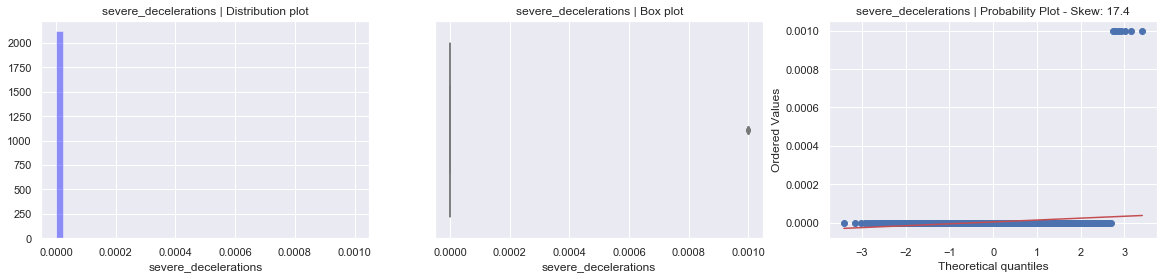

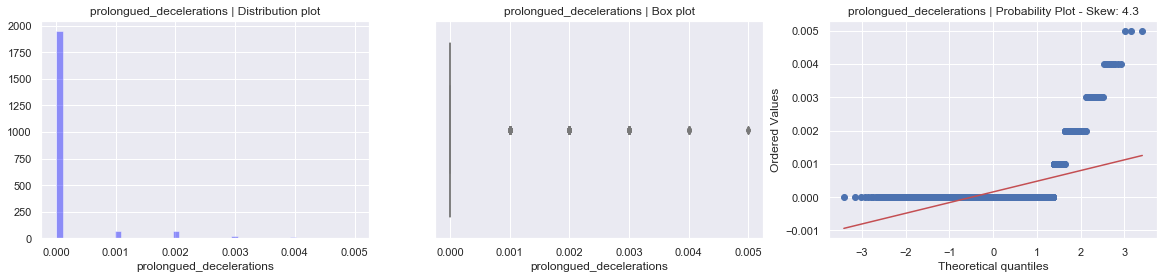

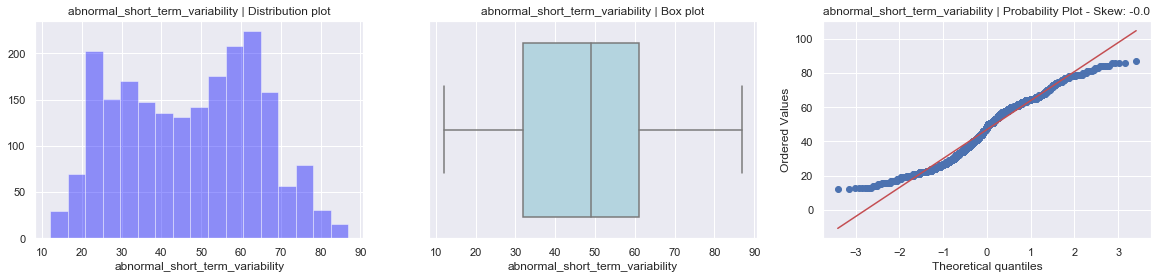

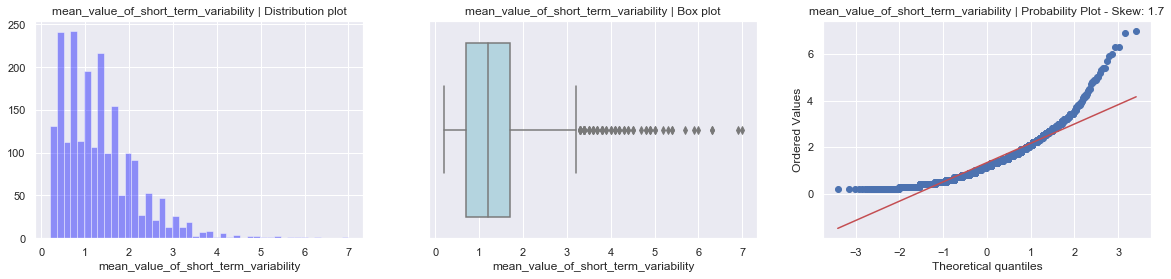

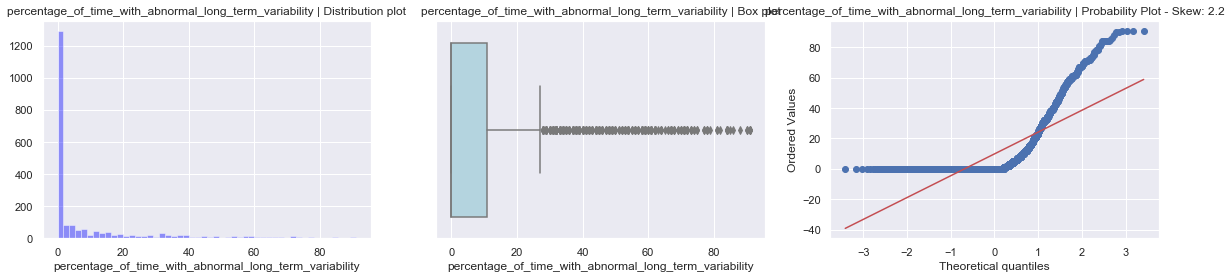

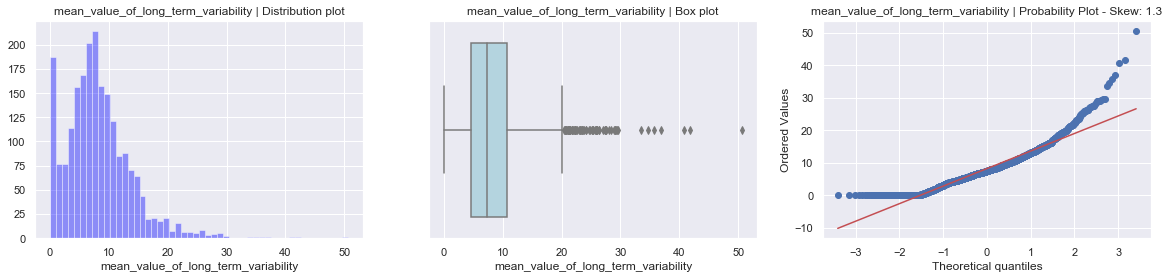

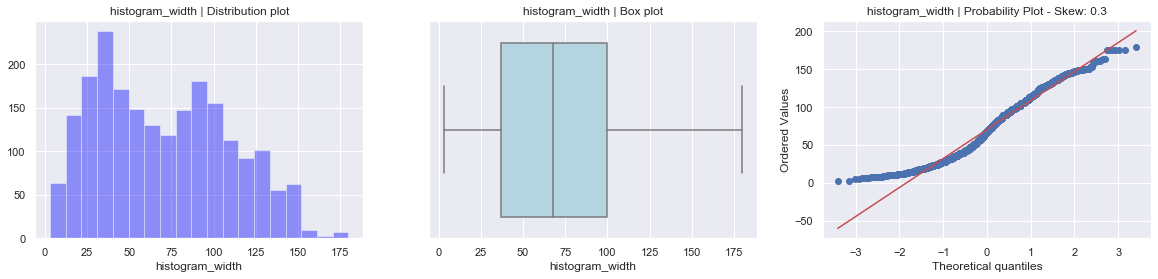

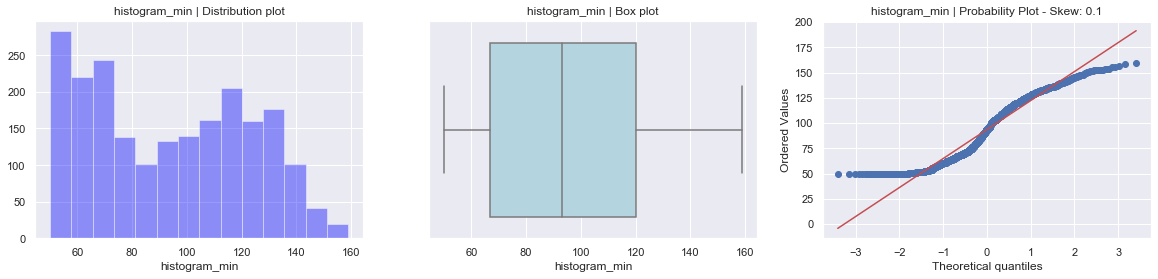

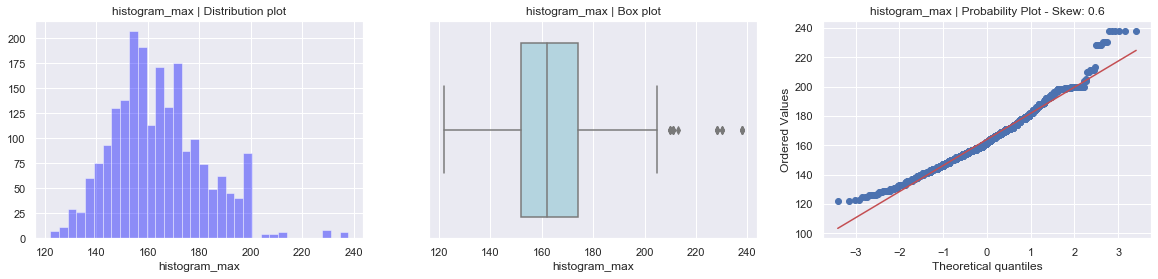

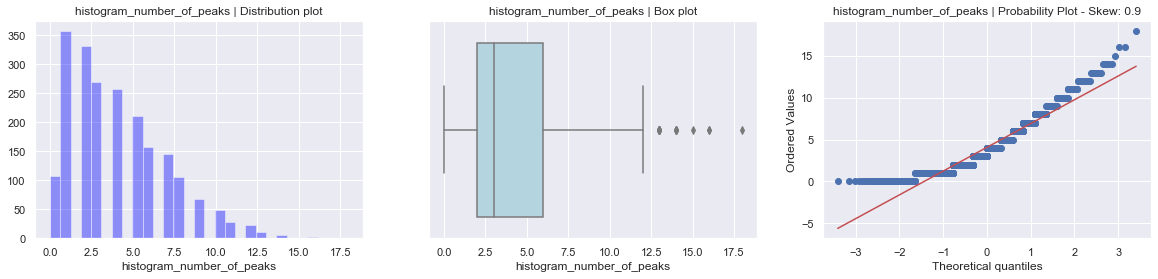

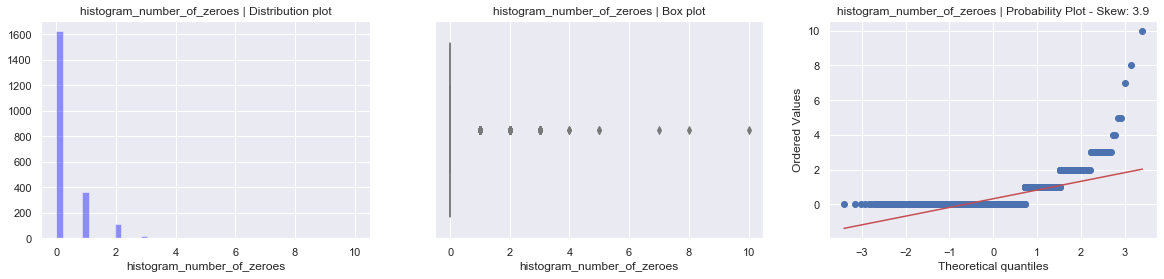

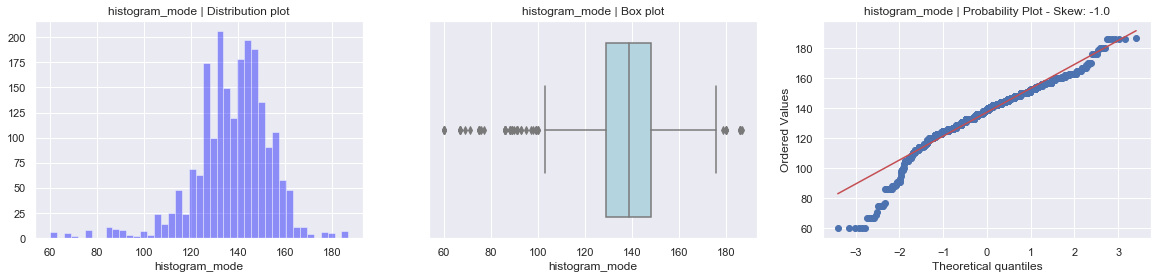

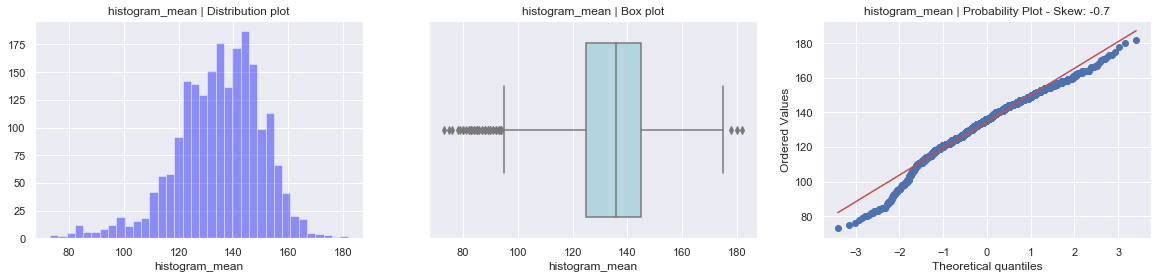

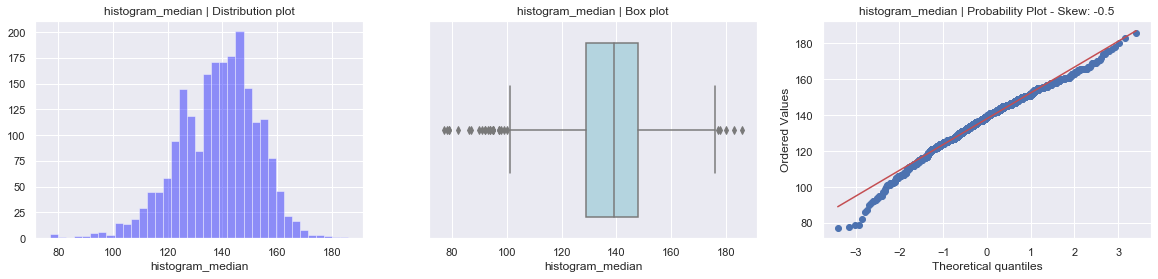

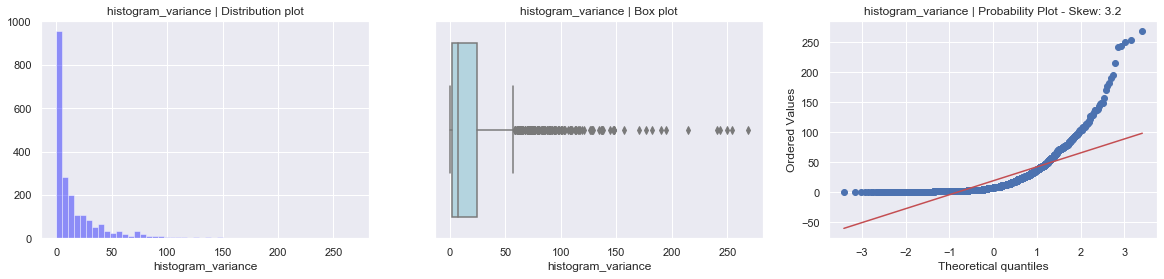

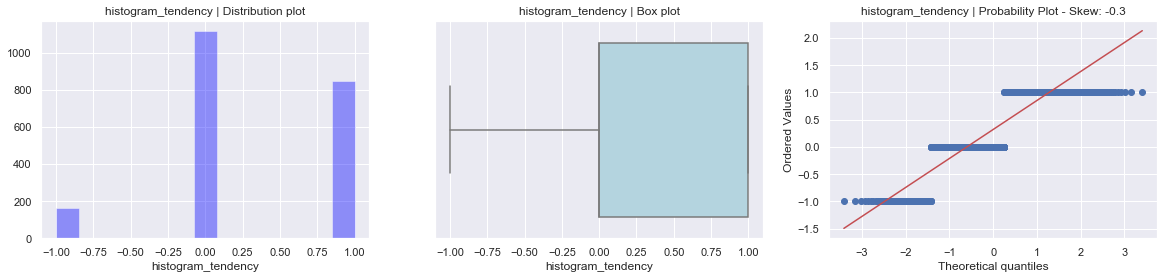

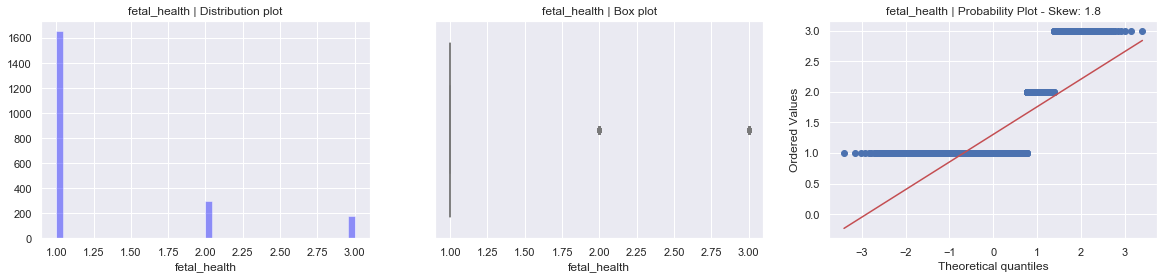

In [154]:
from scipy.stats import probplot,skew

for i in cols:
    fig, axes = plt.subplots(1, 3, figsize=(20,4))
    sns.distplot(fetal[i],kde=False, ax=axes[0], color = "blue")
    sns.boxplot(fetal[i], ax=axes[1], color = "lightblue")
    probplot(fetal[i], plot=axes[2])
    skew_val=round(fetal[i].skew(), 1)
    axes[1].set_yticklabels([])
    axes[1].set_yticks([])
    axes[0].set_title(i + " | Distribution plot")
    axes[1].set_title(i + " | Box plot")
    axes[2].set_title(i + " | Probability Plot - Skew: "+str(skew_val))
    plt.show()

<h3><font color=BLACK>Correlation</font></h3>


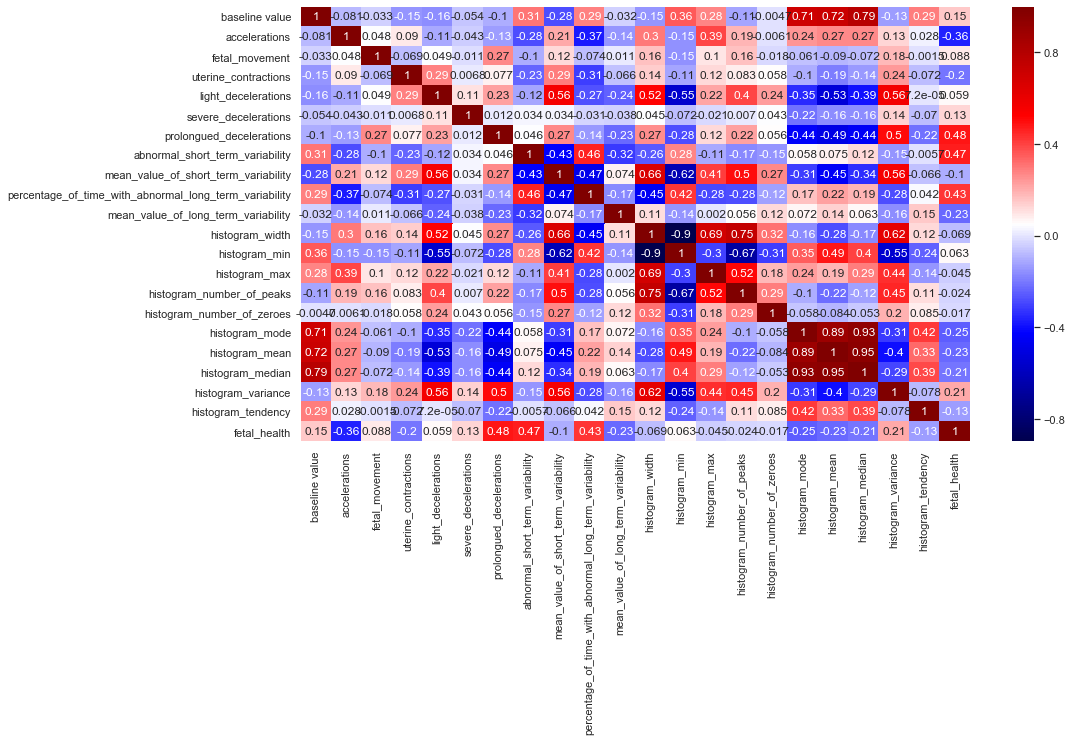

In [155]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1)
sns.heatmap(fetal.corr(), annot=True, cmap='seismic');

From the Correlation Matrix above, I observe the features 'histogram_width' and 'histogram_min' to have a strong negative correlation (-0.9).  

The Correlation matrix above also shows the features 'histogram_mean', 'histogram_median' and 'histogram_mode'are highly correlated, as the values are all above 0.89. 

As a result, I will drop the columns 'histogram_mean', 'histogram_median' and 'histogram_mode' from the dataset so that these features don't lead to the problem of multicollinearity. 



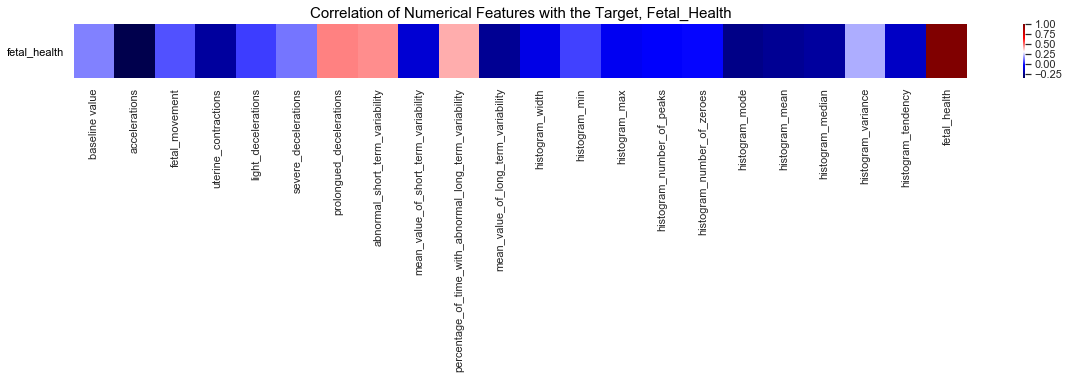

In [156]:
n = fetal.select_dtypes(exclude="object")
c = n.corr()
f,ax=plt.subplots(figsize=(20,1))
sns.heatmap(c.sort_values(by=["fetal_health"], ascending=False).head(1), cmap="seismic")
plt.yticks(color="black", rotation=0)
plt.title("Correlation of Numerical Features with the Target, Fetal_Health", fontsize=15, color="black")

plt.show()

The heat map above visualises the connections between numerical features in the dataset and the target variable, fetal_health. The more red shows features with a high correlation to the target variable. 

The visual clearly shows that "percentage_of_time_with_abnormal_long_term_variability", "abnormal_short_term_variability" and "prolongued_decelerations" are highly correlated with "Fetal_Health". 

<h3><font color=BLACK>Data Pre Processing</font></h3>

<h3><font color=BLACK>Feature Selection</font></h3>

In [157]:
fetal_df = fetal.drop(['histogram_min','histogram_median','histogram_mode'], axis=1)

<h3><font color=BLACK>Missing Values</font></h3>

In [158]:
fetal_df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mean                                            0
histogram_variance                      

<h3><font color=BLACK>Outliers</font></h3>

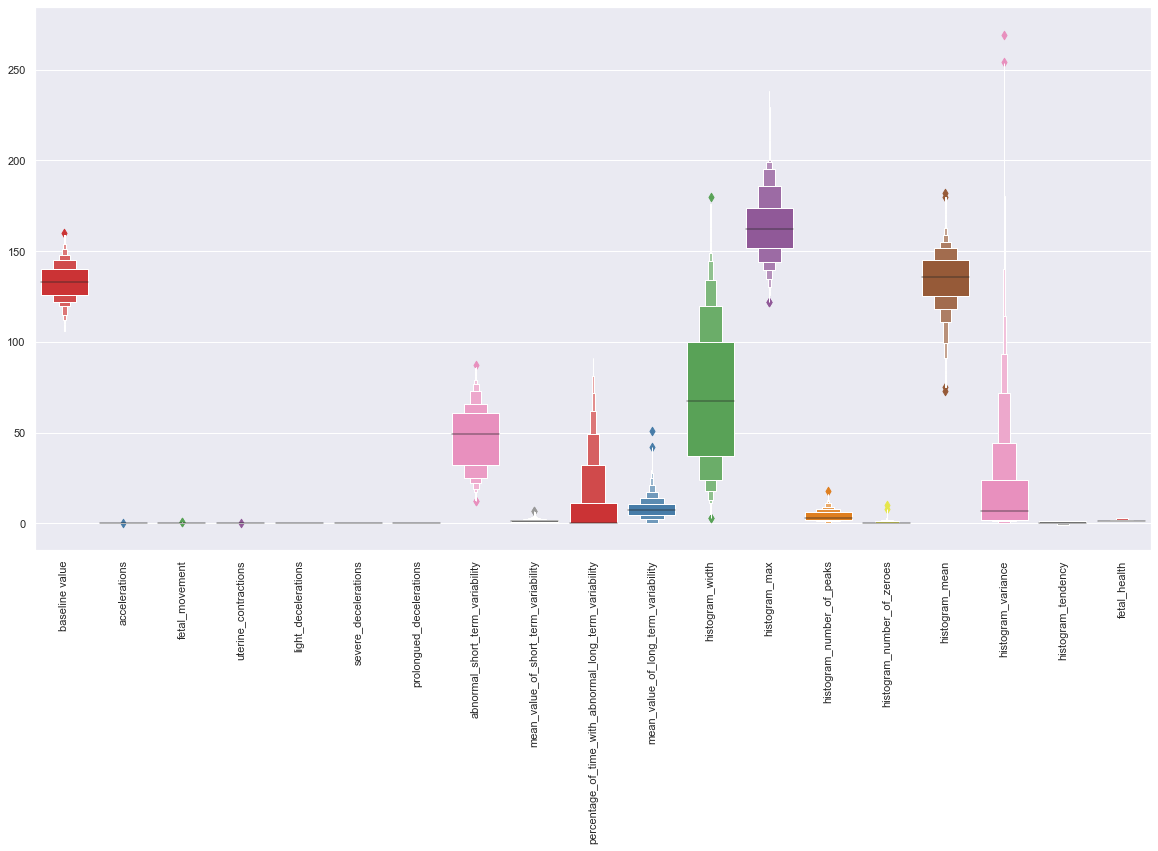

In [159]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = fetal_df, palette = "Set1")
plt.xticks(rotation=90)
plt.show()

We can see there are some obvious outliers in this dataset. However, it is not always best practise to remove these outliers as it can lead to overfitting although we may end up with better statistics.

As this data was collected and reported by experts, we can assume the behaviour of our data is natural for the study of foetal health. Also as the data has come from a CTG report it is unlikely data was entered incorrectly. 

<h3><font color=BLACK>Train the Models - Before Over-sampling and Scaling </font></h3>

In [160]:
X = fetal_df.drop('fetal_health', axis = 1)
y = fetal_df['fetal_health'] 
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mean,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,126.0,2.0,0.0,137.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,198.0,6.0,1.0,136.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,198.0,5.0,1.0,135.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,170.0,11.0,0.0,134.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,170.0,9.0,0.0,136.0,11.0,1.0


In [161]:
# Importing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

In [162]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1488, 18), (638, 18), (1488,), (638,))

In [163]:
lr=LogisticRegression(random_state=42)

dt=DecisionTreeClassifier(random_state=42)

rf=RandomForestClassifier()

svc=SVC() #RBF Kernal 

knn= KNeighborsClassifier()

gb = GradientBoostingClassifier()

ab= AdaBoostClassifier()

nn= MLPClassifier() #multilayer perceptron feedforaward artifical neural network model)

xgb=XGBClassifier()

<h3><font color=BLACK>Implement Cross Validation  </font></h3>

In [164]:
pipelines = [lr,dt,rf,svc,knn,gb,ab,nn,xgb]
cv = StratifiedKFold(10, shuffle=True, random_state=42)

In [165]:
model_results = pd.DataFrame()
row_number = 0
results = []
names = []

for ml in pipelines:
    model_name=ml.__class__.__name__
    cv_results = cross_validate(ml, X_train, y_train, cv=cv, scoring='f1_macro', return_train_score=True, n_jobs=-1 )
    model_results.loc[row_number,'Model Name']=model_name
    model_results.loc[row_number, 'Train Accuracy Mean']=cv_results['train_score'].mean()
    model_results.loc[row_number, 'Test Accuracy Mean']=cv_results['test_score'].mean()
    model_results.loc[row_number, 'Fit Time Mean']=cv_results['fit_time'].mean()
    results.append(cv_results)
    names.append(model_name)
    
    row_number+=1

<h3><font color=BLACK> Models Results and Performance - Before Over-sampling and Scaling </font></h3>

In [166]:
display(model_results.style.background_gradient(cmap='seismic'))

,Model Name,Train Accuracy Mean,Test Accuracy Mean,Fit Time Mean
0,LogisticRegression,0.740016,0.723641,0.178819
1,DecisionTreeClassifier,0.999155,0.888375,0.0261267
2,RandomForestClassifier,0.999157,0.89297,0.505247
3,SVC,0.656641,0.640607,0.103921
4,KNeighborsClassifier,0.853366,0.79372,0.00737917
5,GradientBoostingClassifier,0.993048,0.91267,2.44646
6,AdaBoostClassifier,0.751792,0.696058,0.228888
7,MLPClassifier,0.809969,0.783828,1.76766
8,XGBClassifier,0.999157,0.921353,2.15254


<h3><font color=BLACK>Precision, Recall and F1 Scores</font></h3>

In [167]:
pipelines = [lr,dt,rf,svc,knn,gb,ab,nn,xgb]
for pipelines in pipelines:
    pipelines.fit(X_train, y_train)
    y_pred = pipelines.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(pipelines,'\n', 'Classification_Report:','\n', report, '\n')

LogisticRegression(random_state=42) 
 Classification_Report: 
               precision    recall  f1-score   support

           1       0.89      0.95      0.92       497
           2       0.49      0.36      0.42        88
           3       0.88      0.70      0.78        53

    accuracy                           0.85       638
   macro avg       0.75      0.67      0.70       638
weighted avg       0.83      0.85      0.84       638
 

DecisionTreeClassifier(random_state=42) 
 Classification_Report: 
               precision    recall  f1-score   support

           1       0.93      0.95      0.94       497
           2       0.74      0.65      0.69        88
           3       0.83      0.85      0.84        53

    accuracy                           0.90       638
   macro avg       0.84      0.82      0.83       638
weighted avg       0.90      0.90      0.90       638
 

RandomForestClassifier() 
 Classification_Report: 
               precision    recall  f1-score   suppor

<h3><font color=BLACK>Balancing the data</font></h3>

The last step of feature engineering is oversampling, because we have unbalanced data the prediction will tend to have a bias towards the most frequent class, I will use oversampling to balance the labels and have the same number of instances per class.

In [168]:
df_1 = fetal_df[fetal_df.fetal_health==1]
df_2 = fetal_df[fetal_df.fetal_health==2]
df_3 = fetal_df[fetal_df.fetal_health==3]
 
# Upsample the Suspect Class
df_2_res = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=1655,    # to match majority class
                                 random_state=42) # reproducible results
#Upsample the Pathological class
df_3_res = resample(df_3, 
                                 replace=True,     # sample with replacement
                                 n_samples=1655,    # to match majority class
                                 random_state=42) # reproducible results

# Join Data Frame
df_res = pd.concat([df_1, df_2_res, df_3_res])
 
# Display new class counts
df_res.fetal_health.value_counts()

3    1655
2    1655
1    1655
Name: fetal_health, dtype: int64

<h3><font color=BLACK>Scaling the data</font></h3>

In [169]:
X = df_res.drop('fetal_health', axis = 1)
y = df_res['fetal_health'] 
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mean,histogram_variance,histogram_tendency
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,198.0,6.0,1.0,136.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,198.0,5.0,1.0,135.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,170.0,11.0,0.0,134.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,170.0,9.0,0.0,136.0,11.0,1.0
12,131.0,0.005,0.072,0.008,0.003,0.0,0.0,28.0,1.4,0.0,12.9,66.0,154.0,5.0,0.0,134.0,7.0,1.0


In [170]:
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mean,histogram_variance,histogram_tendency
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,198.0,6.0,1.0,136.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,198.0,5.0,1.0,135.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,170.0,11.0,0.0,134.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,170.0,9.0,0.0,136.0,11.0,1.0
12,131.0,0.005,0.072,0.008,0.003,0.0,0.0,28.0,1.4,0.0,12.9,66.0,154.0,5.0,0.0,134.0,7.0,1.0


<h3><font color=BLACK>TrainTest Split</font></h3>

In [171]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, learning_curve, cross_validate, train_test_split, KFold

In [172]:
# Importing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

In [173]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3475, 18), (1490, 18), (3475,), (1490,))

<h3><font color=BLACK>Feature Scaling</font></h3>


In [174]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [175]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3475, 18), (1490, 18), (3475,), (1490,))

<h3><font color=BLACK>Run Models</font></h3>

In [176]:
lr=LogisticRegression(random_state=42)

dt=DecisionTreeClassifier(random_state=42)

rf=RandomForestClassifier()

svc=SVC() #RBF Kernal 

knn= KNeighborsClassifier()

gb = GradientBoostingClassifier()

ab= AdaBoostClassifier()

nn= MLPClassifier() #multilayer perceptron feedforaward artifical neural network model)

xgb=XGBClassifier()

In [177]:
pipelines = [lr,dt,rf,svc,knn,gb,ab,nn,xgb]
cv = StratifiedKFold(10, shuffle=True, random_state=42)

In [178]:
model_results = pd.DataFrame()
row_number = 0
results = []
names = []

for ml in pipelines:
    model_name=ml.__class__.__name__
    cv_results = cross_validate(ml, X_train, y_train, cv=cv, scoring='f1_macro', return_train_score=True, n_jobs=-1 )
    model_results.loc[row_number,'Model Name']=model_name
    model_results.loc[row_number, 'Train Accuracy Mean']=cv_results['train_score'].mean()
    model_results.loc[row_number, 'Test Accuracy Mean']=cv_results['test_score'].mean()
    model_results.loc[row_number, 'Fit Time Mean']=cv_results['fit_time'].mean()
    results.append(cv_results)
    names.append(model_name)
    
    row_number+=1

In [179]:
display(model_results.style.background_gradient(cmap='seismic'))

,Model Name,Train Accuracy Mean,Test Accuracy Mean,Fit Time Mean
0,LogisticRegression,0.868261,0.861495,0.246939
1,DecisionTreeClassifier,0.999712,0.980935,0.0310172
2,RandomForestClassifier,0.999712,0.985591,0.884434
3,SVC,0.939864,0.930023,0.588524
4,KNeighborsClassifier,0.967287,0.944787,0.00428879
5,GradientBoostingClassifier,0.987879,0.972274,3.86885
6,AdaBoostClassifier,0.87662,0.869928,0.426657
7,MLPClassifier,0.979477,0.967797,9.01847
8,XGBClassifier,0.999712,0.989053,4.04278


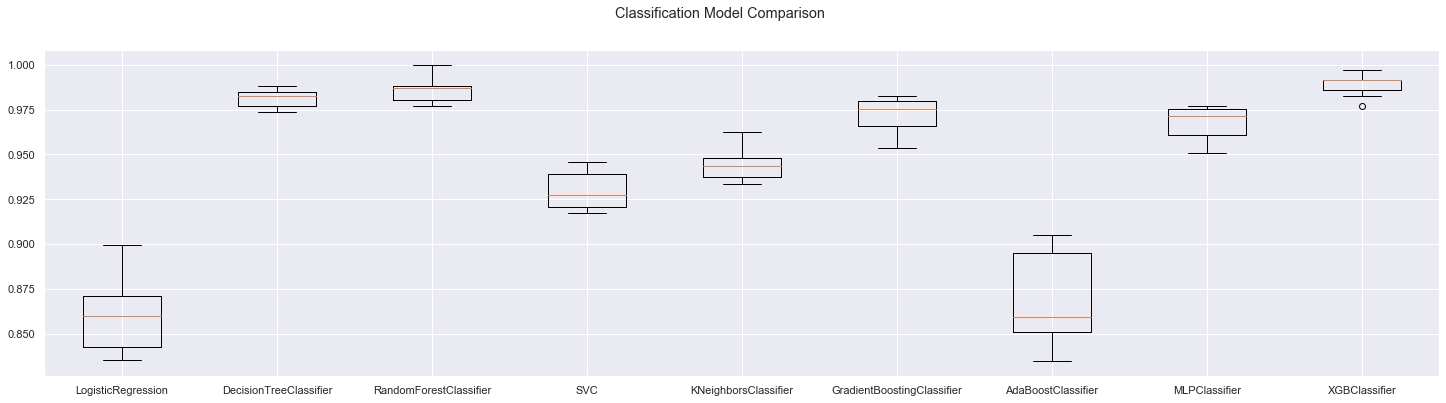

In [181]:
cv_results_array = []
for tt in results:
    cv_results_array.append(tt['test_score'])

fig = plt.figure(figsize=(25, 6))
fig.suptitle('Classification Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(cv_results_array)
ax.set_xticklabels(names)
plt.show()

<h3><font color=BLACK>Precision, Recall and F1 Scores</font></h3>

In [ ]:
pipelines = [lr,dt,rf,svc,knn,gb,ab,nn,xgb]
for pipelines in pipelines:
    pipelines.fit(X_train, y_train)
    y_pred = pipelines.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(pipelines,'\n', 'Classification_Report:','\n', report, '\n')

<h3><font color=BLACK>Hyperparameter tuning</font></h3>

<h3><font color=BLACK>Random Forest - Using GridSearchCV to find the best parameters</font></h3>

In [182]:
params = {"tol": [0.0001,0.0002,0.0003],
          "intercept_scaling": [1, 2, 3, 4]
         }

In [183]:
cv_method = StratifiedKFold(n_splits=3, random_state=42,shuffle=True)

In [184]:
RF_Params = {"min_samples_split": [2, 6, 20],
             "min_samples_leaf": [1, 4, 16],
             "n_estimators" :[100,150, 200, 250],
             "criterion": ["gini"]             
            }

In [185]:
RF_GridSearchCV = GridSearchCV(estimator=RandomForestClassifier(), 
                                param_grid=RF_Params, 
                                cv=cv_method,
                                n_jobs=2,
                                scoring="accuracy"
                                )

In [186]:
RF_GridSearchCV.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini'], 'min_samples_leaf': [1, 4, 16],
                         'min_samples_split': [2, 6, 20],
                         'n_estimators': [100, 150, 200, 250]},
             scoring='accuracy')

In [187]:
best_params_RF = RF_GridSearchCV.best_params_
best_params_RF

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 250}

In [188]:
rf3 = RandomForestClassifier(criterion="gini", n_estimators = 250, min_samples_leaf=1, min_samples_split=2, random_state=42)
rf3.fit(X_train, y_train)
rf3.score(X_test, y_test)

0.9885906040268456

In [189]:
pred_rf3 = rf3.predict(X_test)
print("***Classification Report Random Forest tuned***")
print(classification_report(y_test, pred_rf3))

***Classification Report Random Forest tuned***
              precision    recall  f1-score   support

           1       1.00      0.97      0.98       496
           2       0.97      1.00      0.99       497
           3       0.99      1.00      1.00       497

    accuracy                           0.99      1490
   macro avg       0.99      0.99      0.99      1490
weighted avg       0.99      0.99      0.99      1490



In [190]:
f1_score(y_test, pred_rf3, average=None)

array([0.9825641 , 0.98611111, 0.99699097])

In [191]:
def plot_confusion_matrix(cm, classes, normalized=True, cmap='seismic'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)


In [192]:
cm = confusion_matrix(y_test, pred)
cm

array([[491,   4,   1],
       [  6, 491,   0],
       [  0,   0, 497]], dtype=int64)

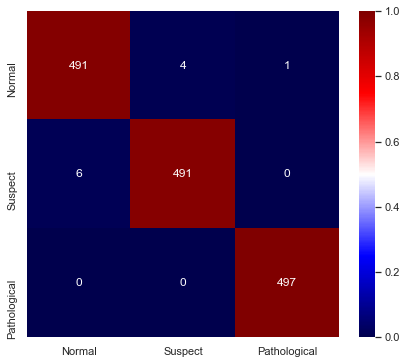

In [193]:
plot_confusion_matrix(cm, ['Normal', 'Suspect', 'Pathological'])

<h3><font color=BLACK>XGBoost - Using GridSearchCV to find the best parameters</font></h3>

In [194]:
xgb = XGBClassifier(random_state=42, nthread=-1)

params = {
            'n_estimators' : [100, 150, 200, 250],
            'max_depth': [10, 15],
        }
        

scorers = {
            'f1_score':make_scorer(f1_score,average='macro'),
            'f1_score_weighted':make_scorer(f1_score,average='weighted'),
            'precision_score': make_scorer(precision_score,average='macro'),
            'recall_score': make_scorer(recall_score,average='weighted'),
            'accuracy_score': make_scorer(accuracy_score)
          }

skf = StratifiedKFold(n_splits=2)

grid = GridSearchCV(xgb, 
                    param_grid = params, 
                    scoring = scorers, 
                    n_jobs = -1, 
                    cv = skf.split(X_train, y_train),
                    refit = "f1_score_weighted")

grid.fit(X_train, y_train)

[16:51:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=<generator object _BaseKFold.split at 0x00000239B3D5B408>,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_chil...
             param_grid={'max_depth': [10, 15],
                         'n_estimators': [100, 150, 200, 250]},
             refit='f1_score_weighted',
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score, average=macro),
                      'f1_

In [195]:
best_params= grid.best_params_
best_model = grid.best_estimator_
best_params

{'max_depth': 10, 'n_estimators': 200}

In [196]:
xgb = XGBClassifier(random_state=42,n_estimators=200,max_depth=10)
xgb.fit(X_train,y_train)
pred = xgb.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm
xgb.score(X_test, y_test)

[16:51:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9885906040268456

In [197]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      0.97      0.98       496
           2       0.98      1.00      0.99       497
           3       0.99      1.00      1.00       497

    accuracy                           0.99      1490
   macro avg       0.99      0.99      0.99      1490
weighted avg       0.99      0.99      0.99      1490



In [198]:
f1_score(y_test, pred, average=None)

array([0.98263534, 0.98605578, 0.99699097])

In [199]:
cm = confusion_matrix(y_test, pred)
cm

array([[481,  12,   3],
       [  2, 495,   0],
       [  0,   0, 497]], dtype=int64)

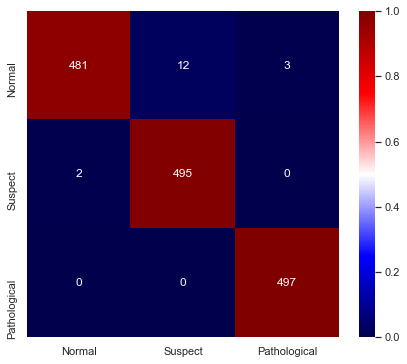

In [200]:
plot_confusion_matrix(cm, ['Normal', 'Suspect', 'Pathological'])

<h3><font color=BLACK>Model Stacking</font></h3>

In [201]:
estimators = [
    ('rf3', RandomForestClassifier(random_state=42,class_weight='balanced_subsample')),
    ('gb', GradientBoostingClassifier(random_state=42),
    ('xgb',XGBClassifier(random_state=42)), 
    )
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=RandomForestClassifier(random_state=55), cv=5
)

clf.fit(X_train, y_train).score(X_test, y_test)


0.9926174496644296

In [202]:
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       496
           2       0.99      0.99      0.99       497
           3       1.00      1.00      1.00       497

    accuracy                           0.99      1490
   macro avg       0.99      0.99      0.99      1490
weighted avg       0.99      0.99      0.99      1490



In [203]:
f1_score(y_test, pred, average=None)

array([0.98892246, 0.98991935, 0.99899497])

In [204]:
cm = confusion_matrix(y_test, pred)
cm

array([[491,   4,   1],
       [  6, 491,   0],
       [  0,   0, 497]], dtype=int64)

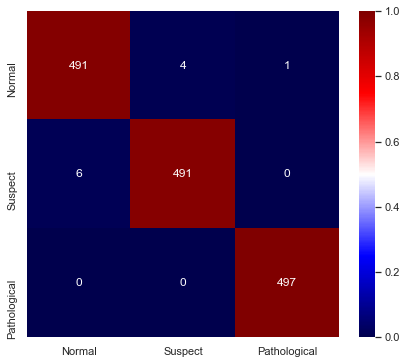

In [205]:
plot_confusion_matrix(cm, ['Normal', 'Suspect', 'Pathological'])